<a href="https://colab.research.google.com/github/jeydion/springboard/blob/master/Springboard_Project_Ultimate_Technologies%2C_Inc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [0]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import hashlib
import os
import json
import requests
import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [0]:
# Load Logins Data
logins_dict = json.loads(requests.get("https://raw.githubusercontent.com/jeydion/springboard/master/logins.json").text)
logins_df = pd.DataFrame(logins_dict)
logins_df.head(10)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [0]:
# Data Cleaning
# Sort data by time, organize data into 15 minute intervals

logins_df.login_time = pd.to_datetime(logins_df.login_time)
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [0]:
logins_df = logins_df.sort_values(by='login_time')
logins_df.head(10)

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37
5,1970-01-01 20:21:41
10,1970-01-01 20:26:05
4,1970-01-01 20:26:21
11,1970-01-01 20:31:03
12,1970-01-01 20:34:46


In [0]:
print(min(logins_df.login_time))
print(max(logins_df.login_time))

1970-01-01 20:12:16
1970-04-13 18:57:38


In [0]:
logins_df.set_index('login_time').sort_index().resample('15T').size().head(10)

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
1970-01-01 21:15:00    4
1970-01-01 21:30:00    0
1970-01-01 21:45:00    4
1970-01-01 22:00:00    9
1970-01-01 22:15:00    8
Freq: 15T, dtype: int64

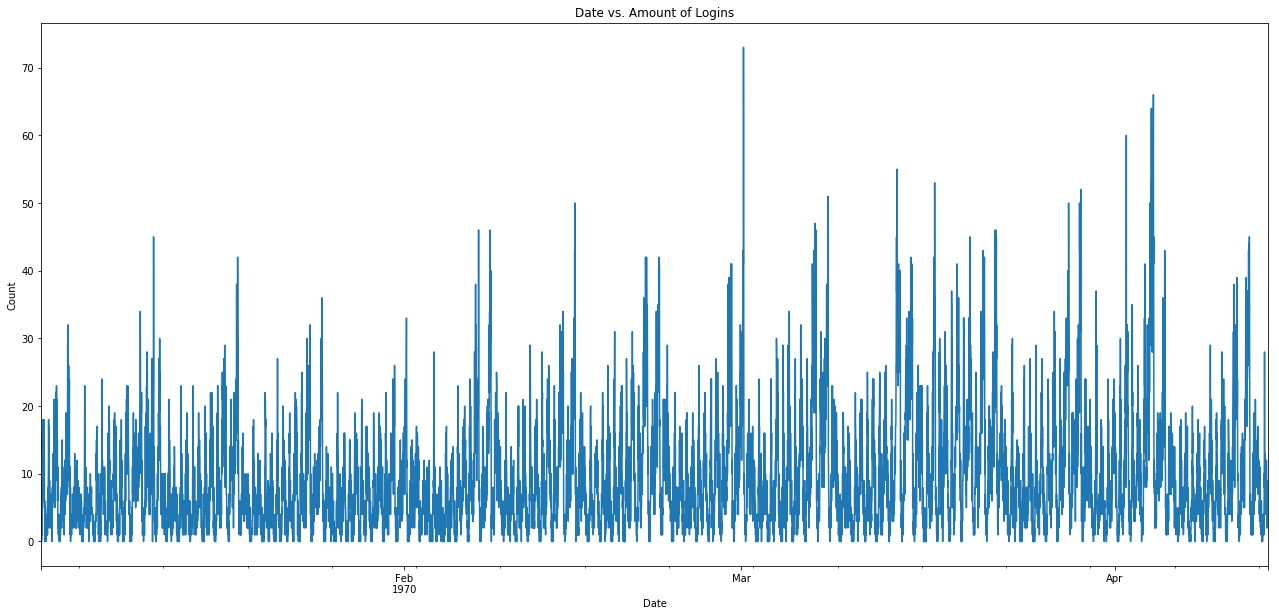

In [0]:
# Data visualization
plt.figure(figsize=(22, 10))
logins_df.set_index('login_time').sort_index().resample('15T').size().plot()
plt.title('Date vs. Amount of Logins')
plt.xlabel('Date')
plt.ylabel('Count');

There appear to be four peaks every month which could correspond with the weekends. Also as the year progresses, the peaks are increasing at an increasing rate. 

## Part 2 - Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a. how you will implement the experiment<br/>
b. what statistical test(s) you will conduct to verify the significance of the observation<br/>
c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
Solution

##2a.
Assuming the toll is active 24/7 I would first deactivate tolls for a period of three months to compare it with the current timestamps data. I would then compare the means of each time period to check if there was a significant change. 

##2b.
Now that I can compare two sets of data, I would use t-test to test the difference in means between the two time series datasets. 

##2c. 
I would recommend the city reinstate the tolls or eliminate them completely depending on the results of the t-test. If the increase in timestamps in both cities. The increase needs to be statistically significant by testing the p-stat with the t-test. If there is an increase in only one of the cities I would recommend increasing tolls to that city but eliminating tolls going the other way. This would encourage traffic to that city with no tolls as compared to the city with tolls. 

##Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).

In [0]:
# Load Ultimate Data
ultimate_dict = json.loads(requests.get("https://raw.githubusercontent.com/jeydion/springboard/master/ultimate_data_challenge.json").text)
ultimate_df = pd.DataFrame(ultimate_dict)
ultimate_df.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


In [0]:
ultimate_df.info()
#ultimate_df.shape()
ultimate_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [0]:
# Clean Data
# Convert Datetime columns

ultimate_df[['last_trip_date', 'signup_date']] = ultimate_df[['last_trip_date', 'signup_date']].apply(pd.to_datetime)
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


### Find missing values
 
There are three columns with missing values; avg_rating_by_driver, avg_rating_of_driver, phone.

WIthout any other context, the discrepancy between ratings by the drivers and of the drivers could simply be that riders are less likely to review drivers. If you are a driver, you have more invested in this endeavor than the rider. For the driver, this could simply be a habit where the riders are all individuals who have their own preferences of when to rate drivers. Since these are scores, the values will be left as NaN; a value of the mean (2.5) will skew the results, as would 0 or 5. The best solution is to remove these data points from the dataset. It will remove close to 18% of the total data but we will be better able to analyze the remainder of the data. 

There are only a few hundred values missing from phone. Since this seems like excess data, those users might not have either iPhone or Android. Those values should be replaced with 'other'. 

In [0]:
# Fill missing values from phone

ultimate_df['phone'].fillna('Other', inplace=True)
ultimate_df['phone'].value_counts()

iPhone     34582
Android    15022
Other        396
Name: phone, dtype: int64

In [0]:
# Remove missing data points from avg_rating_by_driver; avg_rating_of_driver

ultimate_df.dropna(inplace=True)
ultimate_df.shape

(41744, 12)

In [0]:
# Remove duplicates, if any
ultimate_df.drop_duplicates(inplace=True)

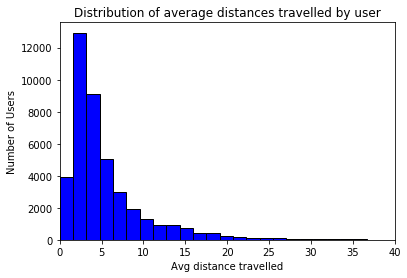

In [0]:
# EDA
plt.hist(ultimate_df['avg_dist'], color = 'blue', edgecolor = 'black',
         bins = int(250/5));
plt.xlim(0,40);
plt.title('Distribution of average distances travelled by user')
plt.xlabel('Avg distance travelled')
plt.ylabel('Number of Users');

In [0]:
weekendsonly = ultimate_df[ultimate_df['weekday_pct'] == 0]['weekday_pct'].count()
weekdaysonly = ultimate_df[ultimate_df['weekday_pct'] == 100]['weekday_pct'].count()
print(weekendsonly)
print(weekdaysonly)
print(weekendsonly + weekdaysonly)

6198
12184
18382


##EDA

Percent of users that only drive on the weekends: 6198/ 41744 = 14.8% <br/>
Percent of users that only drive on the weekdays: 12184/ 41744 = 29.2%

In order to predict the drivers in the 6th month, first the few categorical variables need to boolean variables. We also need to make a new column that will count the number of months a user has been active. If the number is larger than five, the user will be be moved to another column. This column will have boolean values representing if a user 5 or more active months (1) or less (0).  

In [0]:
ultimate_df['last_trip_date'] = pd.to_datetime(ultimate_df['last_trip_date'])
ultimate_df['signup_date'] = pd.to_datetime(ultimate_df['signup_date'])

In [0]:
ultimate_df['nb_months'] = (ultimate_df.last_trip_date - ultimate_df.signup_date)/np.timedelta64(1, 'M')
ultimate_df['active'] = np.where(ultimate_df['nb_months']>5,1,0)
ultimate_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,nb_months,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,4.698248,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,3.154069,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.032855,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,5.585330,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,1.544180,0


In [0]:
ultimate_df.drop(['last_trip_date','signup_date','nb_months'], axis=1, inplace=True)
ultimate_df

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,15.4,4,True,46.2,0
1,8.26,5.0,5.0,1.00,Astapor,Android,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,iPhone,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,Android,11.8,14,False,82.4,0
5,10.56,5.0,3.5,1.00,Winterfell,iPhone,0.0,2,True,100.0,0
7,2.04,5.0,5.0,1.00,Winterfell,iPhone,0.0,2,False,100.0,0
8,4.36,5.0,4.5,1.00,Winterfell,Android,0.0,2,False,100.0,0
10,4.28,4.9,5.0,1.00,Winterfell,iPhone,0.0,1,True,100.0,0
11,3.81,5.0,4.0,1.00,Winterfell,iPhone,0.0,3,False,100.0,0


The next step of preprocessing is to convert the boolean ('ultimate_black_user') and categorical columns ('city','phone') into numerical columns.

In [0]:
# Turn the Boolean series, 'ultimate_black_user', into 0s and 1s
ultimate_df['ultimate_black_user'] *= 1
ultimate_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,15.4,4,1,46.2,0
1,8.26,5.0,5.0,1.00,Astapor,Android,0.0,0,0,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,iPhone,0.0,3,0,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,20.0,9,1,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,Android,11.8,14,0,82.4,0


In [0]:
# Convert the categorical variables into numerical variables with get_dummies 
ultimate_df = pd.get_dummies(ultimate_df)
ultimate_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Other,phone_iPhone
0,3.67,5.0,4.7,1.10,15.4,4,1,46.2,0,0,1,0,0,0,1
1,8.26,5.0,5.0,1.00,0.0,0,0,50.0,0,1,0,0,1,0,0
2,0.77,5.0,4.3,1.00,0.0,3,0,100.0,0,1,0,0,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,1,80.0,1,0,1,0,0,0,1
4,3.13,4.9,4.4,1.19,11.8,14,0,82.4,0,0,0,1,1,0,0


##Model Selection and Evaluation
With the dataframe setup for testing, the data will now be split between train-test. The hyperparameters can be found using GridSearchCV. Evaluation of the model will be done with Accuracy and AUC_ROC. Both will be used since the data is fairly unbalanced. The models that will be tested are Logistic Regression, K-Near Neighbors, and Random Forests. 

In [0]:
# Split data into Train-Test Datasets
X = ultimate_df.drop('active',axis = 1)
y = ultimate_df['active']

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [0]:
# Find percent of month 6 active users
active_pct = len([i for i in y if i ==1])/len(y)
print("%0.2f percent of users were active in their 6th month" % (active_pct*100))

24.95 percent of users were active in their 6th month


In [0]:
# Function to test and evaluate models

def train_test_model(X, y, model, param_grid):
    '''Function will split the data, optimizes hyperparameters based on parameter grid'''
    # Create train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    
    # Instantiate the GridSearchCV object: model_cv
    model_cv = GridSearchCV(model, param_grid=param_grid, cv=5)
    
    # Fit the model to the training data
    model_cv.fit(X_train, y_train)
    
    # Predict the labels of the test set: y_pred
    y_pred = model_cv.predict(X_test)
    
    #Prediction for ROC curve
    y_pred_prob = model_cv.predict_proba(X_test)[:,1]
    
    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show();
    
    # Print the optimal parameters and best score
    print("Tuned Hyperparameter(s): {}".format(model_cv.best_params_))
    print("Tuned Accuracy Score: {}".format(model_cv.best_score_))
    print(classification_report(y_test, y_pred))

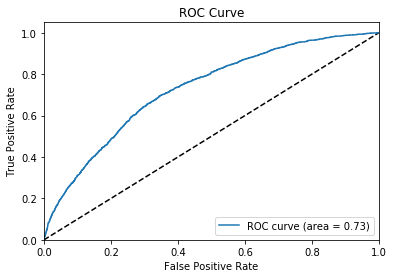

Tuned Hyperparameter(s): {'C': 0.003792690190732246}
Tuned Accuracy Score: 0.7591566589799646
              precision    recall  f1-score   support

           0       0.77      0.98      0.86      6301
           1       0.62      0.13      0.21      2047

    accuracy                           0.77      8348
   macro avg       0.70      0.55      0.54      8348
weighted avg       0.74      0.77      0.70      8348



In [0]:
# Logistic Regression Model

logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
c_space = np.logspace(-10, 8, 20)
logreg_param_grid = {'C': c_space}

train_test_model(X,y,logreg,logreg_param_grid)

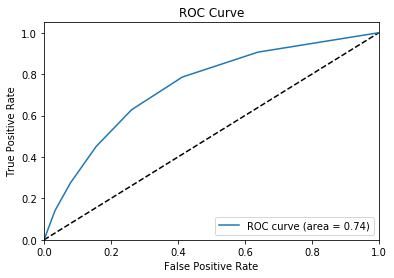

Tuned Hyperparameter(s): {'n_neighbors': 8}
Tuned Accuracy Score: 0.7572699230331527
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      6301
           1       0.53      0.28      0.36      2047

    accuracy                           0.76      8348
   macro avg       0.66      0.60      0.61      8348
weighted avg       0.73      0.76      0.73      8348



In [0]:
# K-Nearest Neighbors Model

knn = KNeighborsClassifier()
N = [1,2,3,4,5,6,7,8,9]
knn_param_grid = {'n_neighbors': N}
train_test_model(X, y, knn, knn_param_grid)

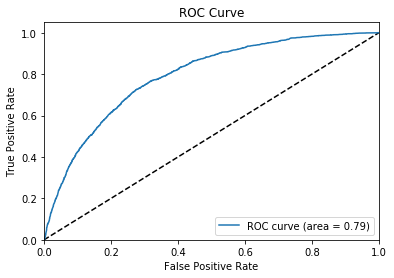

Tuned Hyperparameter(s): {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_split': 190}
Tuned Accuracy Score: 0.7832050552544099
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      6301
           1       0.61      0.35      0.45      2047

    accuracy                           0.79      8348
   macro avg       0.71      0.64      0.66      8348
weighted avg       0.76      0.79      0.76      8348



In [0]:
# Random Forest Model

forest = RandomForestClassifier(n_estimators=5)
forest_param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": range(10,500,20),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
train_test_model(X, y, forest, forest_param_grid)

The model with the best Accuracy and largest AUC ROC is Random Forest with 78% accuracy and 79% AUC. 

WIth the best tuned hyperparameters, the model with be refit and the features will be extracted. 

In [0]:
best_model = RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=None, max_features=3, min_samples_split=250, n_estimators=5)
best_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=250,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:

feature_importances = pd.DataFrame(best_model.feature_importances_, 
             index = X_train.columns, columns = ['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
avg_rating_by_driver,0.171835
avg_surge,0.160841
weekday_pct,0.148407
surge_pct,0.127374
trips_in_first_30_days,0.079270
city_King's Landing,0.070685
phone_Android,0.046756
ultimate_black_user,0.044902
avg_rating_of_driver,0.043742
phone_iPhone,0.036444


The most important features seem to be avg_rating_by_driver, avg_surge and weekday_pct. I will construct a KDE graph of these three comparing active and non-active users to gain further insights. 

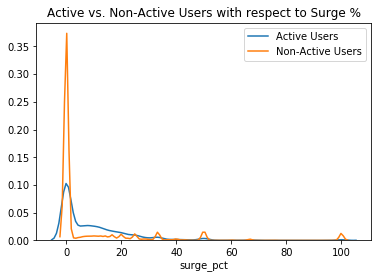

In [0]:
active_users = ultimate_df[ultimate_df['active']==1]
non_active_users = ultimate_df[ultimate_df['active']==0]

sns.distplot(active_users['surge_pct'], hist=False, kde_kws={"label": "Active Users"});
sns.distplot(non_active_users['surge_pct'], hist=False, kde_kws={"label": "Non-Active Users"});
plt.title('Active vs. Non-Active Users with respect to Surge %')
plt.legend();

Non-active users tend to avoid surge pricing as that point above zero is very high. However, active users are more receptive to surge pricing. 

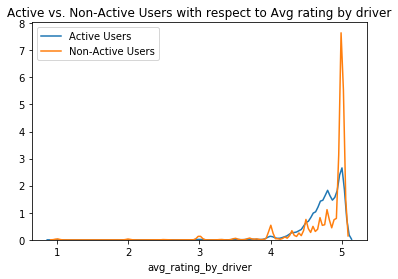

In [0]:
sns.distplot(active_users['avg_rating_by_driver'], hist=False, kde_kws={"label": "Active Users"});
sns.distplot(non_active_users['avg_rating_by_driver'], hist=False, kde_kws={"label": "Non-Active Users"});
plt.title('Active vs. Non-Active Users with respect to Avg rating by driver')
plt.legend();

Non-active users tend to get an average rating of 5, whereas active users tend to have a spread from 4-5. 


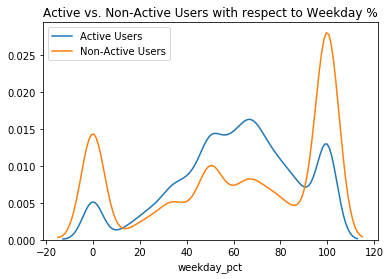

In [0]:
sns.distplot(active_users['weekday_pct'], hist=False, kde_kws={"label": "Active Users"});
sns.distplot(non_active_users['weekday_pct'], hist=False, kde_kws={"label": "Non-Active Users"});
plt.title('Active vs. Non-Active Users with respect to Weekday %')
plt.legend();

Non-active users tend to use the service more on the weekend. The active users are the opposite.

Based on the observations and analysis, these are the following recommendations to boost user-tuernout:


1.   Lower or mitigate surge pricing; perhaps have an monthly allowance of 2 nulled surge pricing trips
2.   Higher more drivers to help alleviate congestion and spread the drivers to the less convenient times; this will help improve active users attitudes which in turn might boost their ratings given by drivers
3.   Provide incentive for users to take trips when they normally don't. For non-active users, encourage them to use the service over their normal work commute. 



